# Introduction

A <b>Neutron Star</b> is a star that forms when a giant star burns all of its Hydrogen into heavier elements, thus no longer emitting enough energy to maintain its structure, so it collapses under its own weight: All of its electrons collapse into the nucleus. A <b>Pulsar</b> is a neutron Star that spins rapidly, containing a beam of electromagnetic radiation along its magnetic poles, which when swept across Earth is detectable. Pulsars are important for many reasons, a few of them being:
<ul>
    <li>Confirming The General Theory of Relativety</li>
    <li>Allowing for new insights in Nuclear Physics</li>
    <li>Confirming of Gravitaty Waves(2017)</li>
    <li>Providing evidence on the origin of heavy metals</li>
</ul>

## Import Statements

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3 

conn = sqlite3.connect('pulsar_data.db')    #Create SQL Database named 'pulsar_data'
pulsar_data = pd.read_csv('pulsar_stars.csv')    #Read the CSV file
pulsar_data.to_sql('pulsar_data', conn, if_exists = 'replace')    #Populate the database with the CSV entries

## Data Inspection

In [2]:
top_of = list(pulsar_data)
print('The names of the columns are: \t')
count = 1
for top in top_of:
    print('\n {}. {}'.format(count, top))
    count += 1

The names of the columns are: 	

 1. mean_of_the_integrated_profile

 2. standard_deviation_of_the_integrated_profile

 3. excess_kurtosis_of_the_integrated_profile

 4. skewness_of_the_integrated_profile

 5. mean_of_the_dm-snr_curve

 6. standard_deviation_of_the_dm-snr_curve

 7. excess_kurtosis_of_the_dm-snr_curve

 8. skewness_of_the_dm-snr_curve

 9. target_class


<i>The dataset has 9 columns, with the above names for each column. The number of rows corresponds to how many potential Pulsars are in this study, and to see how many potential Pulsars there may be, the following statement is executed:</i>



In [3]:
rows = len(pulsar_data)
print("There are {} rows, and therefore there are that many potential Pulsars".format(rows))

There are 17898 rows, and therefore there are that many potential Pulsars


Out of the thousands of rows, how does one know which of these entries are Pulsars and which ones are radio interference and noise? This is found in the <b>target_class</b> column. The identifiers are 1 & 0; 1 is a Pulsar and 0 is something else. To see the rows with a 1, run the code:

In [4]:
not_interference = pulsar_data[pulsar_data['target_class'] > 0] #Sets the index to all entries where target_class > 1 = True
not_interference.head()    #Display just the first five entries

,mean_of_the_integrated_profile,standard_deviation_of_the_integrated_profile,excess_kurtosis_of_the_integrated_profile,skewness_of_the_integrated_profile,mean_of_the_dm-snr_curve,standard_deviation_of_the_dm-snr_curve,excess_kurtosis_of_the_dm-snr_curve,skewness_of_the_dm-snr_curve,target_class
19,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1
42,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1
61,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1
92,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1
93,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,1


According to the dataset documentation, there are 1639 'positive examples' (Pulsars); let's confirm that this is true:

In [12]:
print(len(not_interference))

1639


## Mean of the Integrated Profile

The <b>Integrated Profile</b> (IP) of a Pulsar is akin to the Pulsar's fingerprint. This is the frequency at which the Pulsar 'pulses' EM waves; the frequencies may vary considerably from one event to the next, but on average the integrated profile is quite stable.

#### May or May not Use Cells Between:

In [17]:
spread_of_stars = []
i = 0
for star in range(0, len(not_interference)-1):
    spread_of_stars.append(not_interference.iloc[i][0])
    i += 1
    
#spread_of_noise = pd.read_sql_query("""
#SELECT MIN(mean_of_the_integrated_profile), 
#MAX(mean_of_the_integrated_profile)
#FROM pulsar_data
#WHERE target_class = 0;
#""", conn)

#data_to_plot = [spread_of_stars, spread_of_noise]

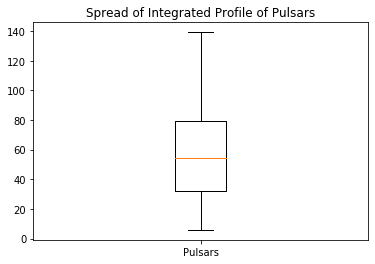

In [15]:
plt.boxplot(spread_of_stars)
plt.title('Spread of Integrated Profile of Pulsars')
plt.xticks([1], ['Pulsars'])
plt.show()

#### Cells Above Aren't Definite

Knowing Pulsars have a unique Integrated Profile, it suffices to say that the count of distinct Integrated Profiles should be 1639; let's investigate using the following SQL query:

In [18]:
pulsar_data.info()
pd.read_sql_query("""
SELECT COUNT(DISTINCT mean_of_the_integrated_profile)
AS 'Unique Integrated Profiles'
FROM pulsar_data
WHERE target_class = 1;
""", conn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
mean_of_the_integrated_profile                  17898 non-null float64
standard_deviation_of_the_integrated_profile    17898 non-null float64
excess_kurtosis_of_the_integrated_profile       17898 non-null float64
skewness_of_the_integrated_profile              17898 non-null float64
mean_of_the_dm-snr_curve                        17898 non-null float64
standard_deviation_of_the_dm-snr_curve          17898 non-null float64
excess_kurtosis_of_the_dm-snr_curve             17898 non-null float64
skewness_of_the_dm-snr_curve                    17898 non-null float64
target_class                                    17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


,Unique Integrated Profiles
0,1544


Evidently, 95 of the positive examples do not have a unique Integrated Profile. Some will have the same IP as the noise. Some Pulsars will have seemingly identical IP's, but this comes down to digit significance (the publisher mentions the data continuous).

A Correlation Heat Map can help to visualize the relationship, if any, columns have with one another. This is done using seaborn:

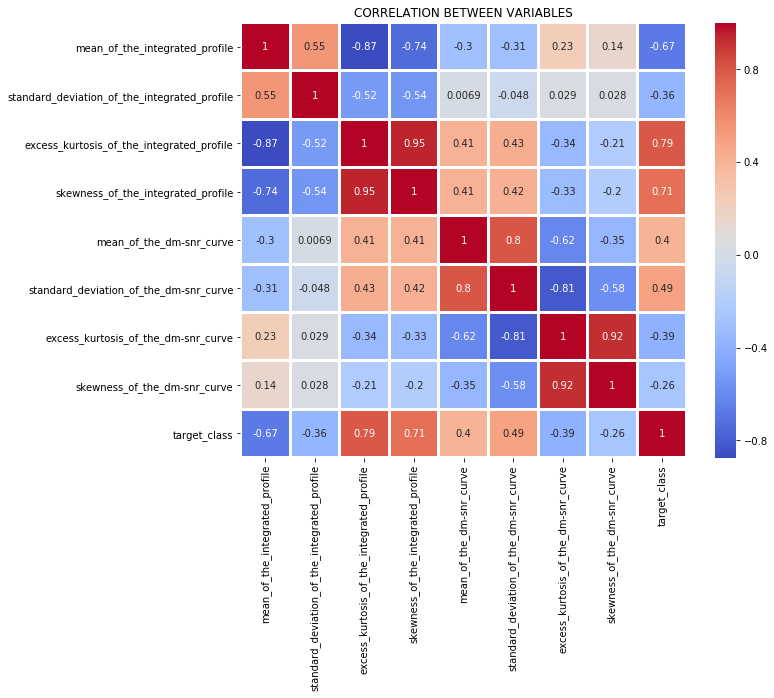

In [26]:
correlated_data = pulsar_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlated_data,annot=True,
            cmap='coolwarm',
            linewidth=2)
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()